In [9]:
# Imports

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2, whiten

# Data
url = 'https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab5/data/seeds_dataset.txt'
df = pd.read_csv(url, sep='\t')
print(df)

      area  perimeter  compactness  length   with  asymmetry  groove  result
0    15.26      14.84       0.8710   5.763  3.312      2.221   5.220       1
1    14.88      14.57       0.8811   5.554  3.333      1.018   4.956       1
2    14.29      14.09       0.9050   5.291  3.337      2.699   4.825       1
3    13.84      13.94       0.8955   5.324  3.379      2.259   4.805       1
4    16.14      14.99       0.9034   5.658  3.562      1.355   5.175       1
..     ...        ...          ...     ...    ...        ...     ...     ...
205  12.19      13.20       0.8783   5.137  2.981      3.631   4.870       3
206  11.23      12.88       0.8511   5.140  2.795      4.325   5.003       3
207  13.20      13.66       0.8883   5.236  3.232      8.315   5.056       3
208  11.84      13.21       0.8521   5.175  2.836      3.598   5.044       3
209  12.30      13.34       0.8684   5.243  2.974      5.637   5.063       3

[210 rows x 8 columns]


In [10]:
# Check if we see some correlations in the set:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,area,perimeter,compactness,length,with,asymmetry,groove,result
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
with,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetry,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
result,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


In [11]:
# Drop the result column from the dataset, and store it in a variable

result = df["result"]
df.drop(columns="result", inplace=True) # inplace=true - operation should be done "in place" (modify df directly)
df.head()

,area,perimeter,compactness,length,with,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [12]:
# Prepare the data for the model

x = np.array(df)    # NumPy array 'x' from df.
clusters = 3        # Variable to be used in a clustering algo.

In [13]:
# Train the model

kmeans = KMeans(n_clusters=clusters, random_state=0, max_iter=300).fit(x)
# ^ Create an instance of K-Means clustering algorithm from scikit-learn
  
cluster=kmeans.labels_
# Assign the cluster labels assigned to each data point in 'x' after the clustering process, to the variable 'cluster'.

c:\Users\G\miniconda3\envs\lab-1\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\G\miniconda3\envs\lab-1\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
# Copy the labels given into the dataframe, so we can use seaborn pairplot

df["y"] = cluster
df.head()

,area,perimeter,compactness,length,with,asymmetry,groove,y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


c:\Users\G\miniconda3\envs\lab-1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


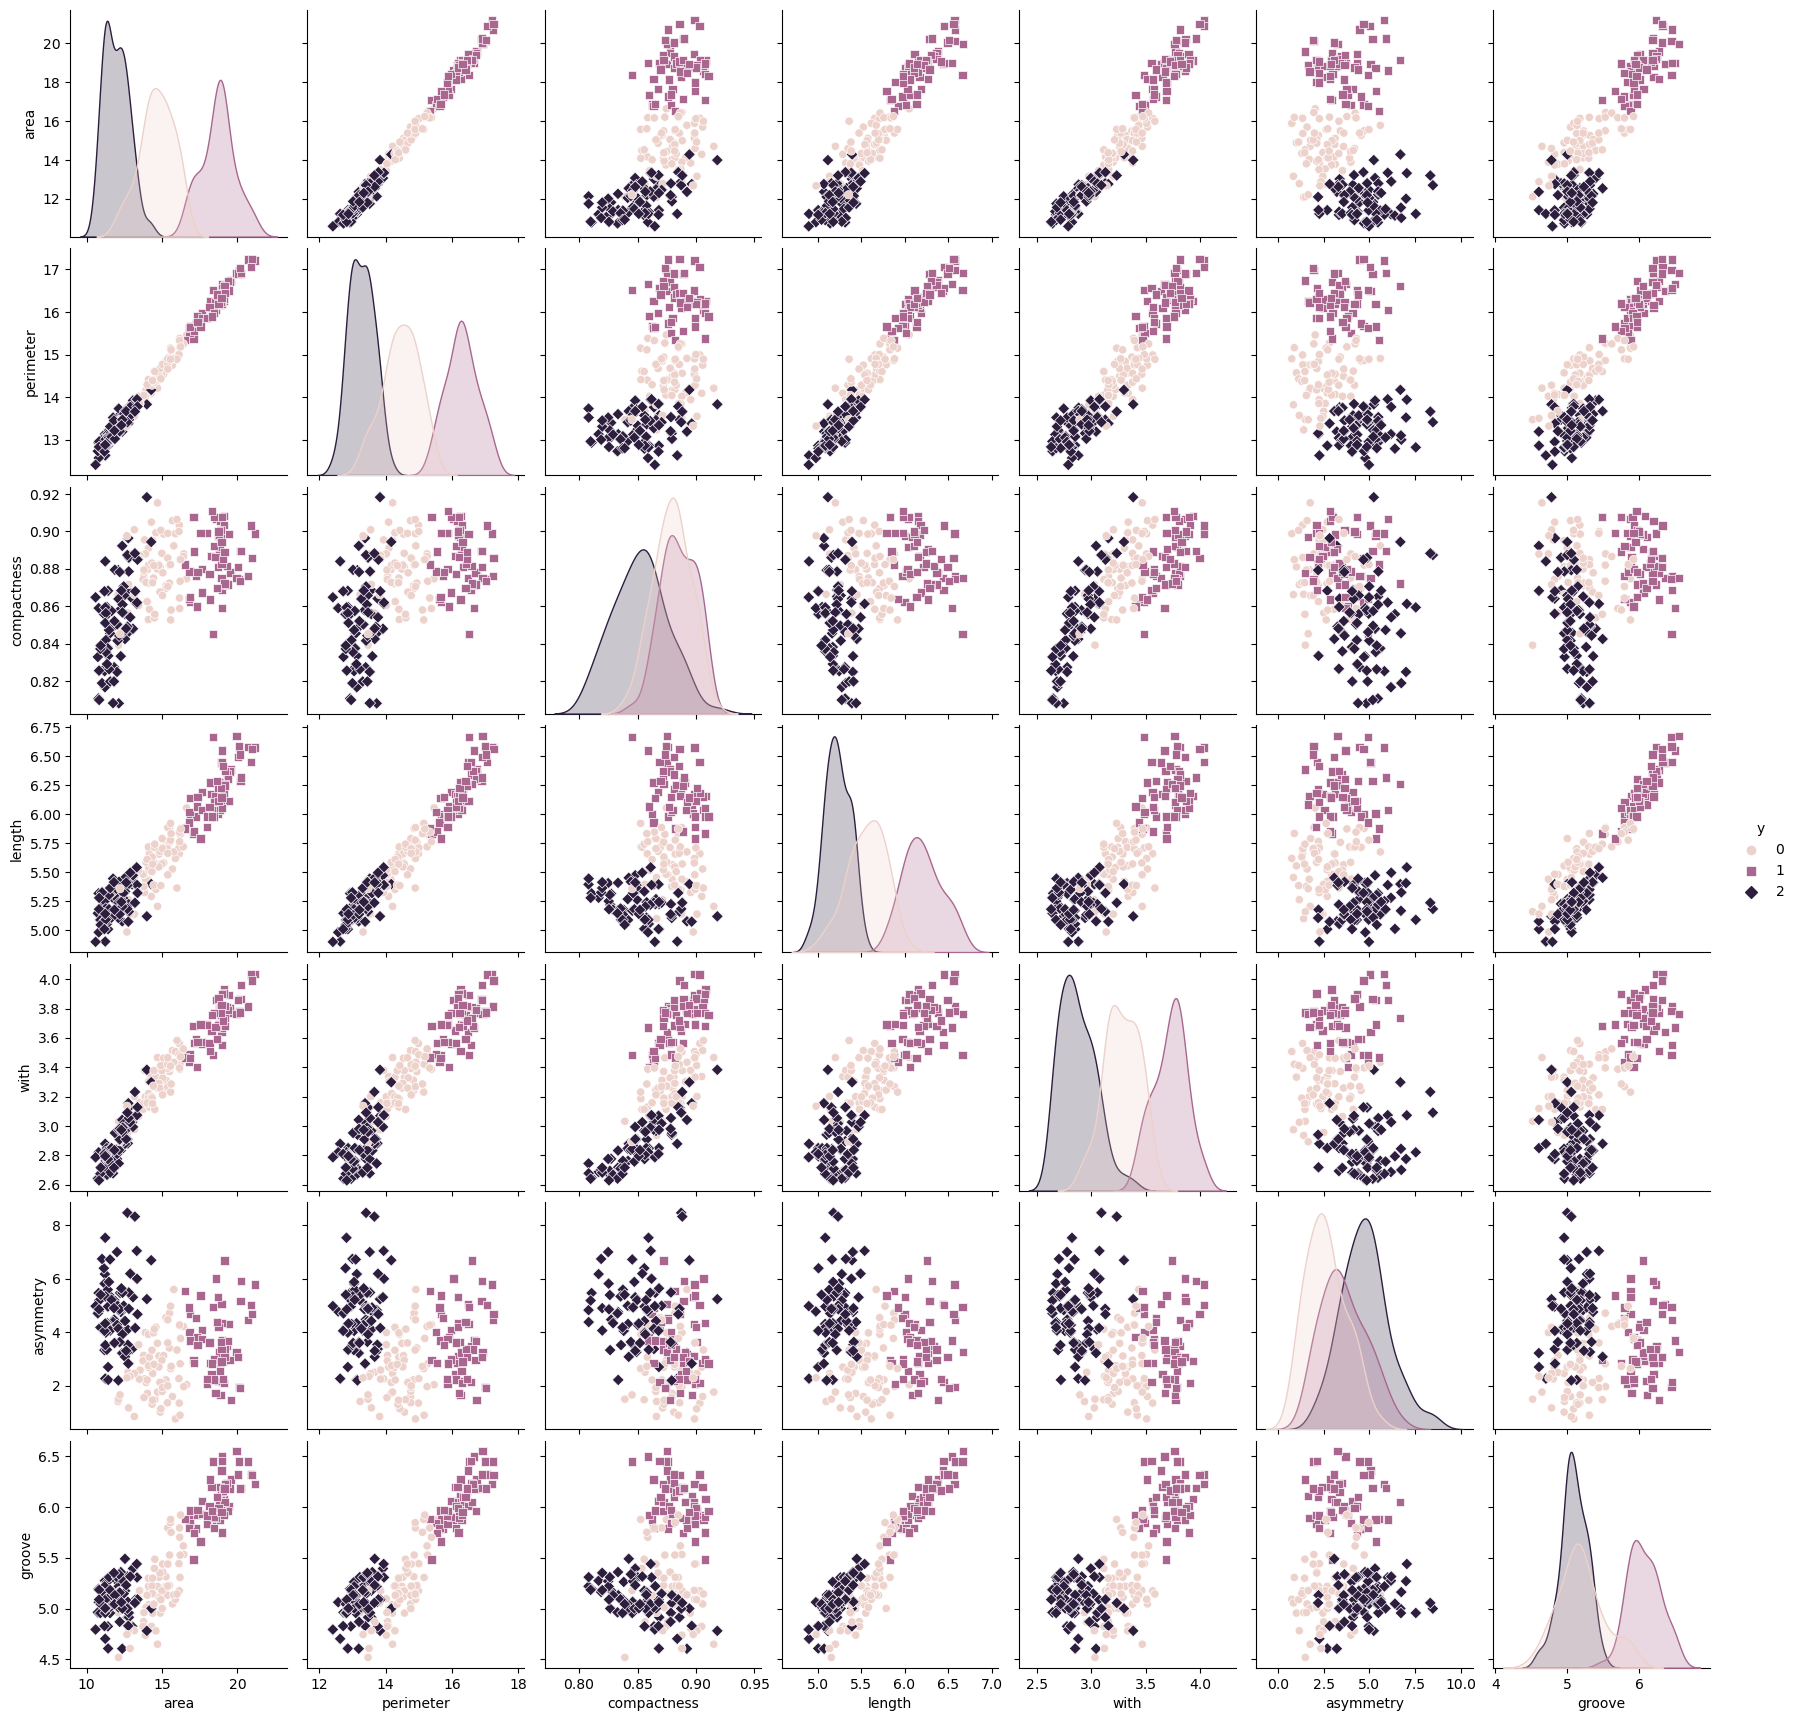

In [18]:
# Pairplot

sns.pairplot(df, vars=df.columns[:-1], hue="y", markers=["o", "s", "D"])

c:\Users\G\miniconda3\envs\lab-1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


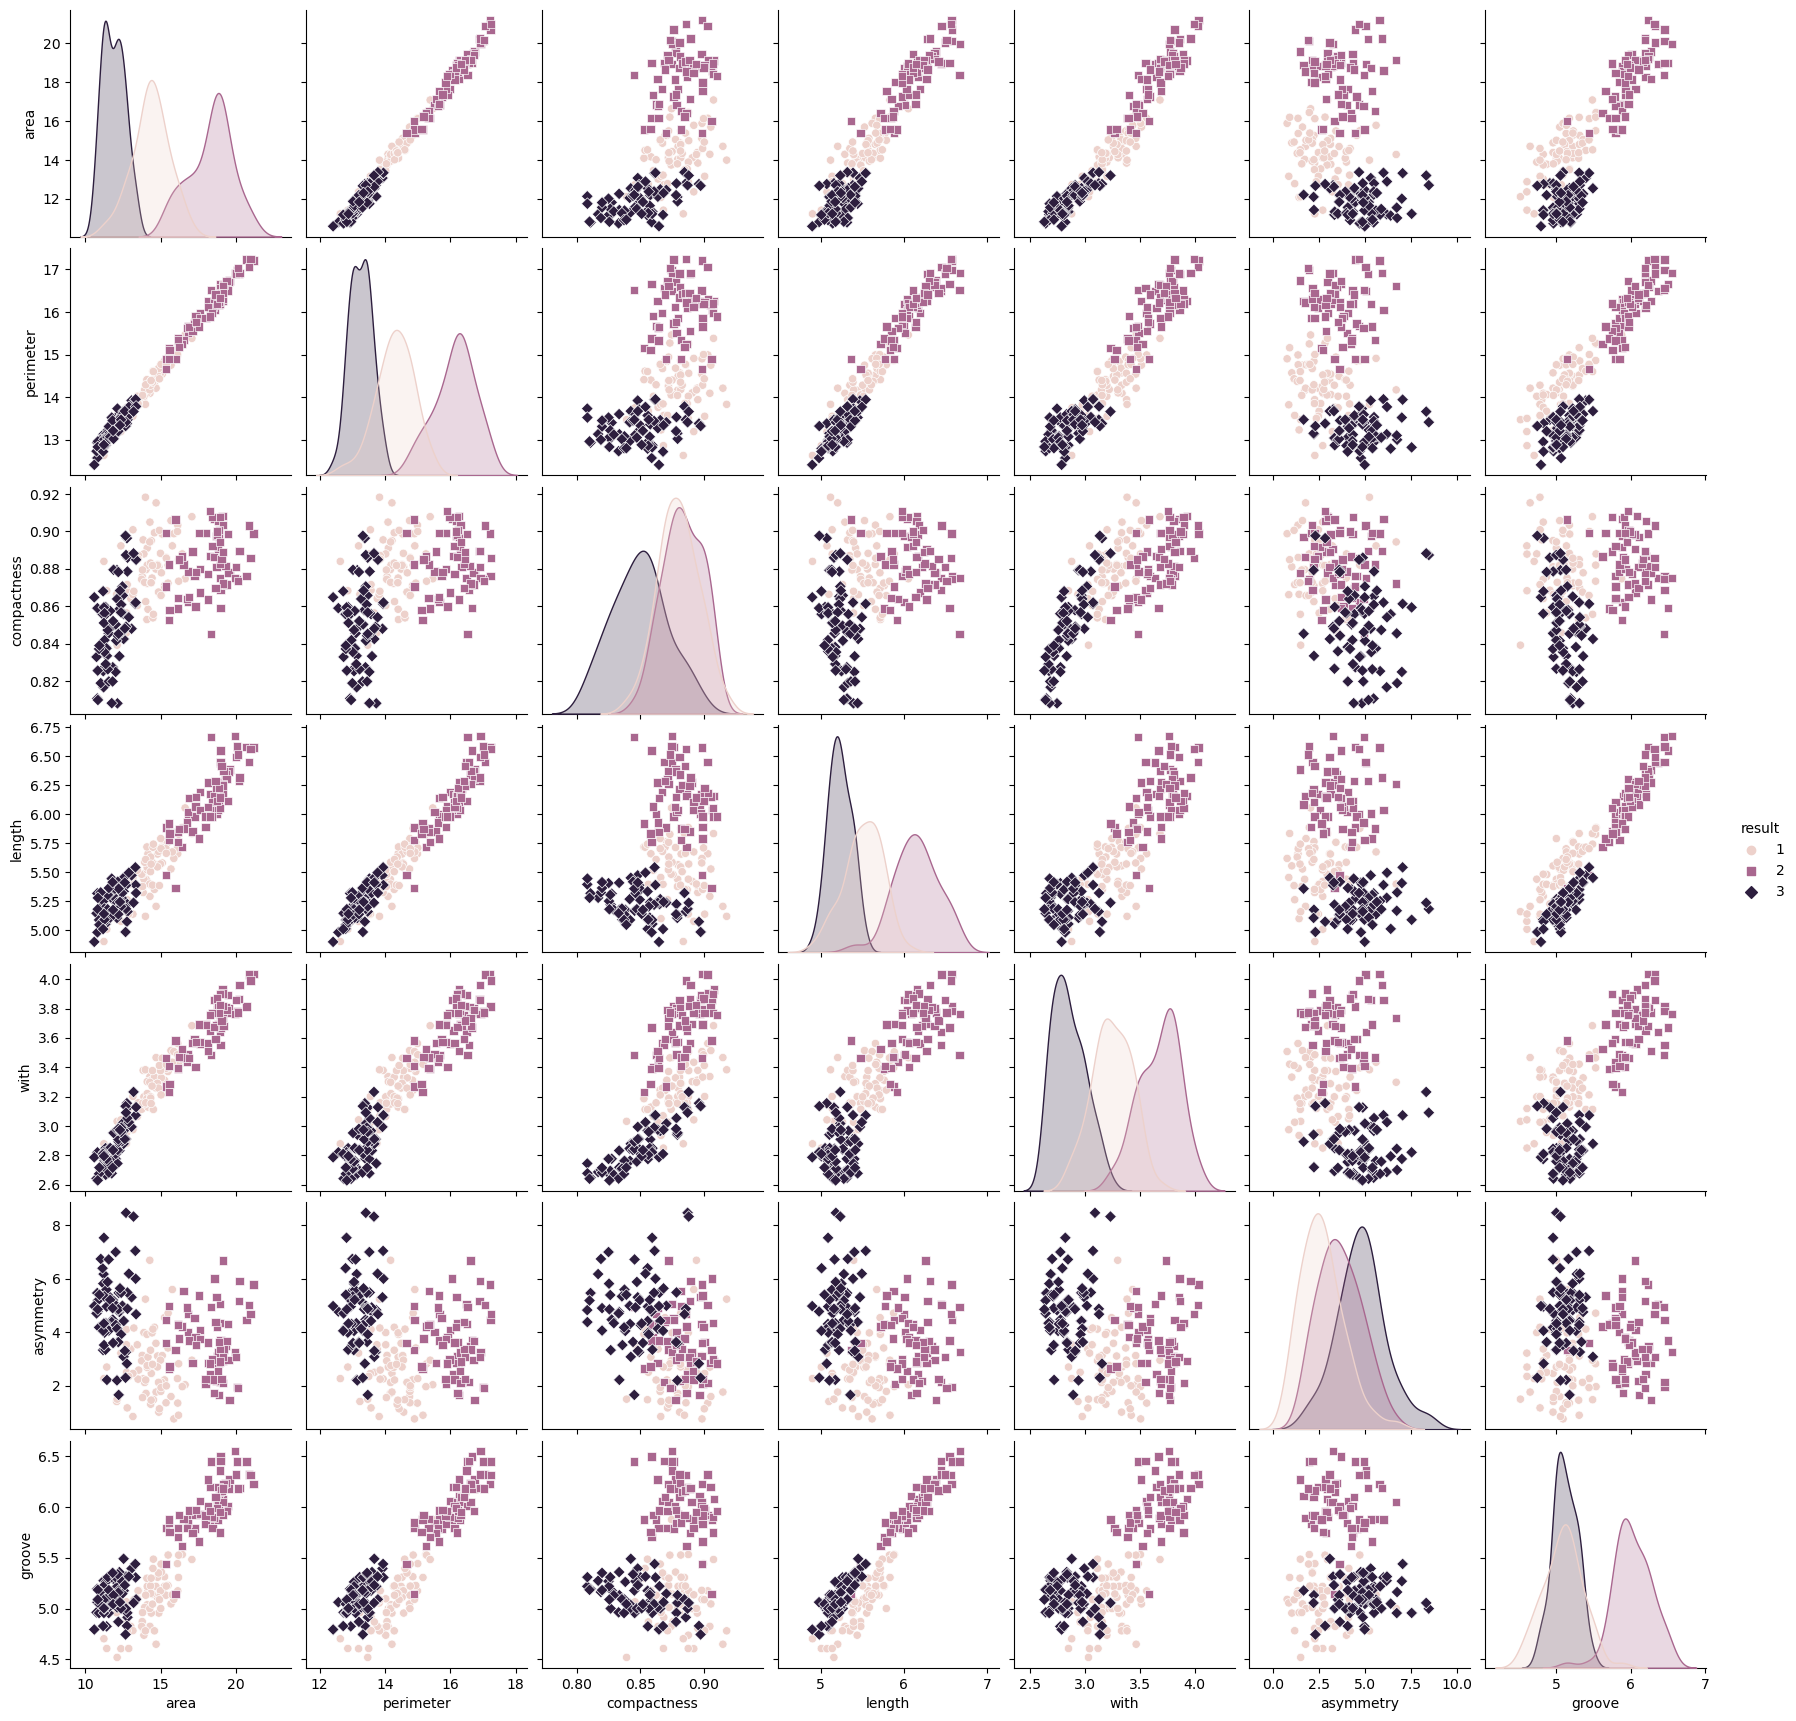

In [19]:
# Compare it to the original labels:

df["result"] = result
sns.pairplot(df, vars=df.columns[:-2], hue="result", markers=["o", "s", "D"])